In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-demo-csv/placement.csv


In [2]:
df=pd.read_csv('/kaggle/input/placement-demo-csv/placement.csv')

In [4]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
import matplotlib.pyplot as plt

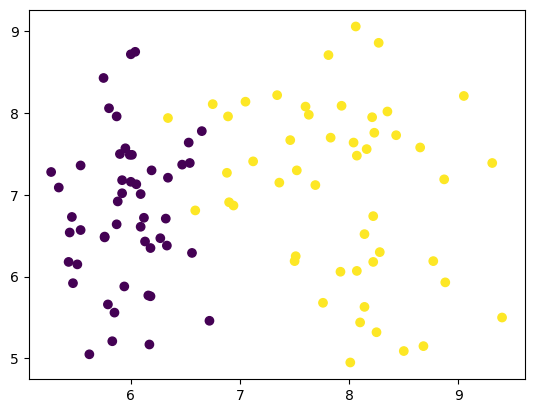

In [9]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
x

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [16]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [17]:
x.shape,y.shape

((100, 2), (100,))

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [23]:
xtrain=scaler.fit_transform(xtrain)

In [25]:
xtrain[:10]

array([[ 0.01652003, -0.06098514],
       [-0.90388184,  0.57465045],
       [ 1.72457352,  0.26187738],
       [-0.03658007,  0.34259301],
       [ 0.7864716 ,  1.79547436],
       [-0.77998159,  1.83583217],
       [-1.0277821 , -0.44438439],
       [-1.00123204, -1.28180905],
       [-0.82423168,  0.56456099],
       [-0.2932306 , -0.12152187]])

In [27]:
xtest=scaler.transform(xtest)

In [28]:
xtest

array([[ 0.99002202,  0.7159028 ],
       [ 0.52982108,  0.37286137],
       [-1.29328264, -0.2022375 ],
       [ 1.1758724 , -1.62485048],
       [ 1.0785222 , -0.41411603],
       [-0.52333107, -0.55536838],
       [ 0.38822079,  0.22151956],
       [-0.02773006,  1.03876532],
       [-0.99238202,  1.13965986],
       [ 0.52097106, -0.68653128]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()

In [31]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [35]:
ypred=model.predict(xtest)

In [33]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(ypred,ytest)

1.0

In [38]:
from mlxtend.plotting import plot_decision_regions as pdr

<Axes: >

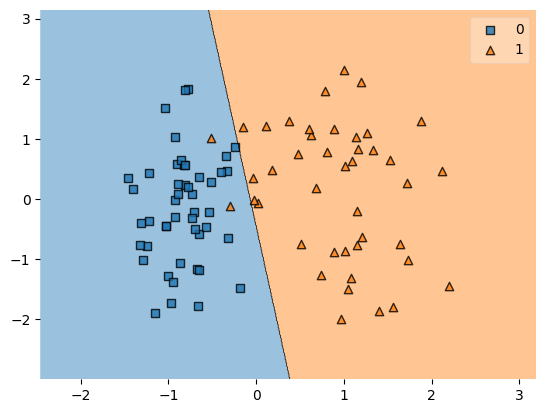

In [39]:
pdr(xtrain,ytrain.values,clf=model)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))